In [ ]:
!pip install deepface

In [ ]:
import os
from deepface import DeepFace
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設定資料夾
root_folder = './'  # 因為你的caucasian, asian, black在根目錄
groups = ['caucasian', 'asian', 'black']
emotions = ['happy', 'sad', 'angry']

# 儲存結果
results = []

# DeepFace 預測每張圖
for group in groups:
    folder = os.path.join(root_folder, group)
    for file in os.listdir(folder):
        if file.endswith('.jpg') or file.endswith('.png'):
            filepath = os.path.join(folder, file)

            # 預測情緒
            try:
                obj = DeepFace.analyze(img_path=filepath, actions=['emotion'], enforce_detection=False)

                # 注意新版DeepFace回傳是list
                pred = obj[0]['dominant_emotion'].lower()

                # 根據檔名推測 true label
                true_label = None
                for emo in emotions:
                    if emo in file.lower():
                        true_label = emo
                        break

                if true_label is not None:
                    results.append({
                        'group': group,
                        'true_emotion': true_label,
                        'predicted_emotion': pred
                    })
            except Exception as e:
                print(f"Error processing {filepath}: {e}")

# 整理成 DataFrame
df = pd.DataFrame(results)

# 顯示前幾筆確認
print(df.head())


25-04-27 08:13:11 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 226MB/s]


       group true_emotion predicted_emotion
0  caucasian        angry          surprise
1  caucasian        happy             happy
2  caucasian        angry             angry
3  caucasian        angry             angry
4  caucasian          sad              fear


各族群情緒分類準確率表格：
true_emotion     angry     happy       sad
group                                     
asian         0.000000  0.800000  0.066667
black         0.133333  0.800000  0.333333
caucasian     0.266667  0.866667  0.266667


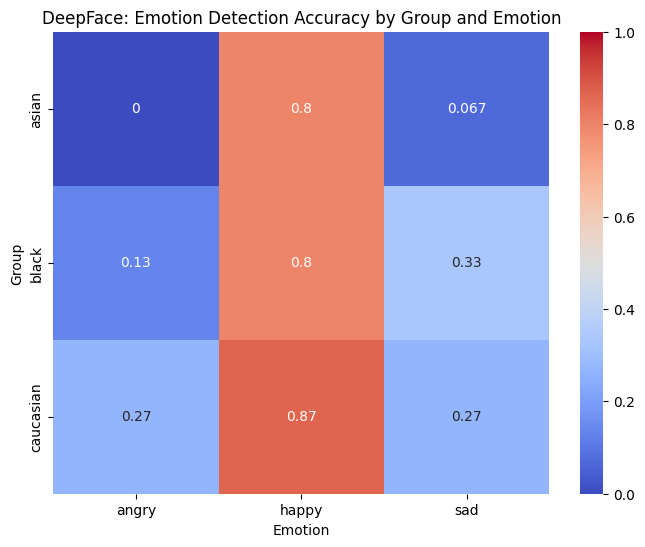

In [ ]:
# 計算每個 group × true_emotion 的準確率
accuracy_table = df.groupby(['group', 'true_emotion']).apply(
    lambda x: (x['true_emotion'] == x['predicted_emotion']).mean()
).unstack()

print("各族群情緒分類準確率表格：")
print(accuracy_table)

# 畫出 Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(accuracy_table, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('DeepFace: Emotion Detection Accuracy by Group and Emotion')
plt.ylabel('Group')
plt.xlabel('Emotion')
plt.show()


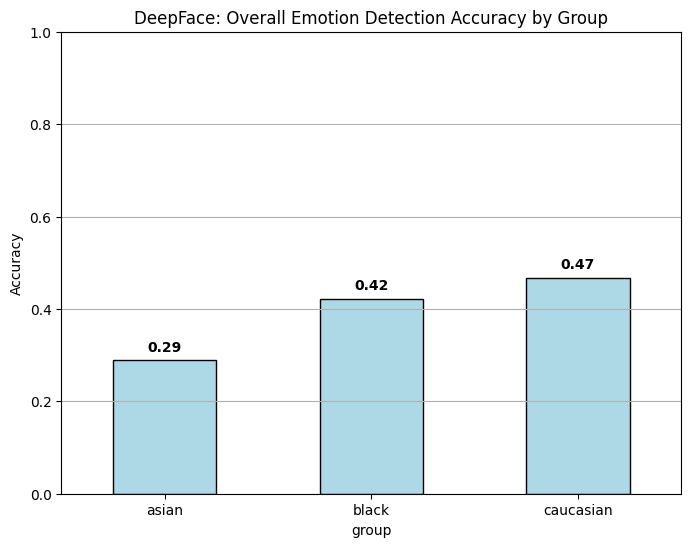

Overall Emotion Detection Accuracy by Group:
group
asian        0.289
black        0.422
caucasian    0.467
dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# 計算每個 group 的總體準確率
overall_accuracy = df.groupby('group').apply(
    lambda x: (x['true_emotion'] == x['predicted_emotion']).mean()
)

# 畫出 bar chart
plt.figure(figsize=(8, 6))
bars = overall_accuracy.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('DeepFace: Overall Emotion Detection Accuracy by Group')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')

# 在每個 bar 上方加上數字
for i, v in enumerate(overall_accuracy):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')

plt.show()

# 額外印出數字表格
print("Overall Emotion Detection Accuracy by Group:")
print(overall_accuracy.round(3))


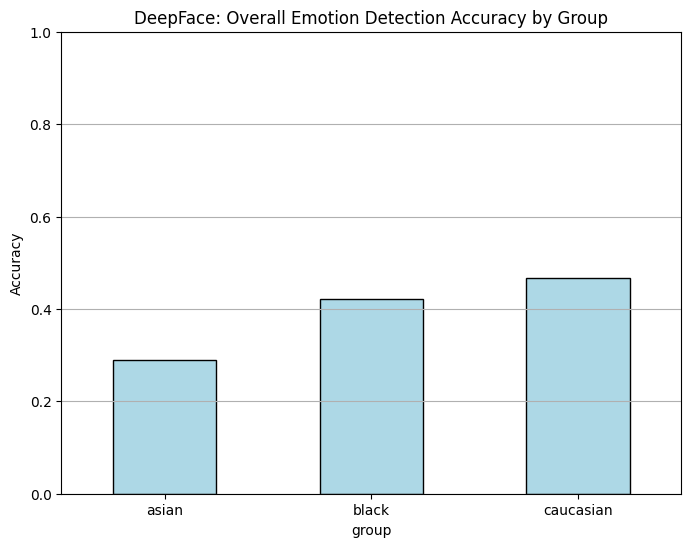

In [ ]:
import matplotlib.pyplot as plt

# 計算每個 group 的總體準確率（全部情緒一起看）
overall_accuracy = df.groupby('group').apply(
    lambda x: (x['true_emotion'] == x['predicted_emotion']).mean()
)

# 畫出 bar chart
plt.figure(figsize=(8, 6))
overall_accuracy.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('DeepFace: Overall Emotion Detection Accuracy by Group')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [ ]:
!pip install keras fer


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━

In [ ]:
!pip install facenet-pytorch

In [ ]:
from fer import FER
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

# 初始化detector
detector = FER(mtcnn=False)

# 設定你的資料夾
root_folder = './'  # 你上傳在根目錄
groups = ['caucasian', 'asian', 'black']
emotions = ['happy', 'sad', 'angry']

# 儲存預測結果
results = []

# 開始做預測
for group in groups:
    folder = os.path.join(root_folder, group)
    for file in os.listdir(folder):
        if file.endswith('.jpg') or file.endswith('.png'):
            filepath = os.path.join(folder, file)

            try:
                img = Image.open(filepath).convert('RGB')
                img = np.array(img)

                # 預測情緒
                preds = detector.detect_emotions(img)

                if preds:
                    # preds是一個list，每個人臉一個dict
                    emotions_pred = preds[0]["emotions"]
                    pred_emotion = max(emotions_pred, key=emotions_pred.get)  # 選最高分的情緒
                else:
                    pred_emotion = 'unknown'

                # 真實label從檔名推斷
                true_label = None
                for emo in emotions:
                    if emo in file.lower():
                        true_label = emo
                        break

                if true_label is not None:
                    results.append({
                        'group': group,
                        'true_emotion': true_label,
                        'predicted_emotion': pred_emotion.lower()
                    })
            except Exception as e:
                print(f"Error processing {filepath}: {e}")

# 整理成 DataFrame
df_mini = pd.DataFrame(results)

# 顯示確認
print(df_mini.head())


       group true_emotion predicted_emotion
0  caucasian        angry          surprise
1  caucasian        happy             happy
2  caucasian        angry           unknown
3  caucasian        angry           unknown
4  caucasian          sad           unknown


true_emotion     angry     happy       sad
group                                     
asian         0.066667  0.600000  0.200000
black         0.066667  0.200000  0.066667
caucasian     0.066667  0.733333  0.066667


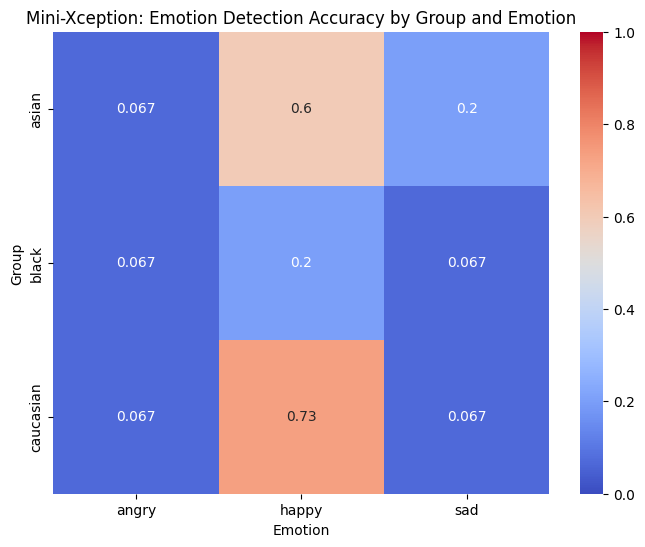

In [ ]:
# 計算每個 group x true_emotion 的準確率
accuracy_table_mini = df_mini.groupby(['group', 'true_emotion']).apply(
    lambda x: (x['true_emotion'] == x['predicted_emotion']).mean()
).unstack()

print(accuracy_table_mini)

# 畫Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(accuracy_table_mini, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Mini-Xception: Emotion Detection Accuracy by Group and Emotion')
plt.ylabel('Group')
plt.xlabel('Emotion')
plt.show()


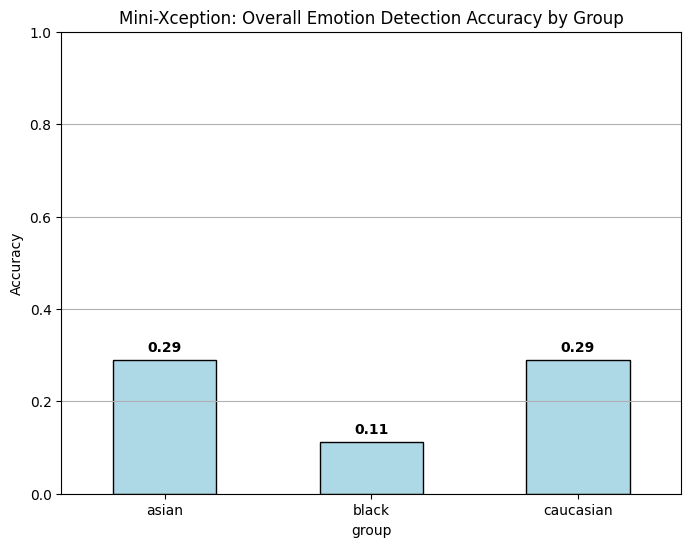

Mini-Xception: Overall Emotion Detection Accuracy by Group:
group
asian        0.289
black        0.111
caucasian    0.289
dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# 計算每個 group 的總體準確率
overall_accuracy_mini = df_mini.groupby('group').apply(
    lambda x: (x['true_emotion'] == x['predicted_emotion']).mean()
)

# 畫出 bar chart
plt.figure(figsize=(8, 6))
bars = overall_accuracy_mini.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Mini-Xception: Overall Emotion Detection Accuracy by Group')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')

# 在每個 bar 上方加上數字
for i, v in enumerate(overall_accuracy_mini):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')

plt.show()

# 額外印出數字表格
print("Mini-Xception: Overall Emotion Detection Accuracy by Group:")
print(overall_accuracy_mini.round(3))


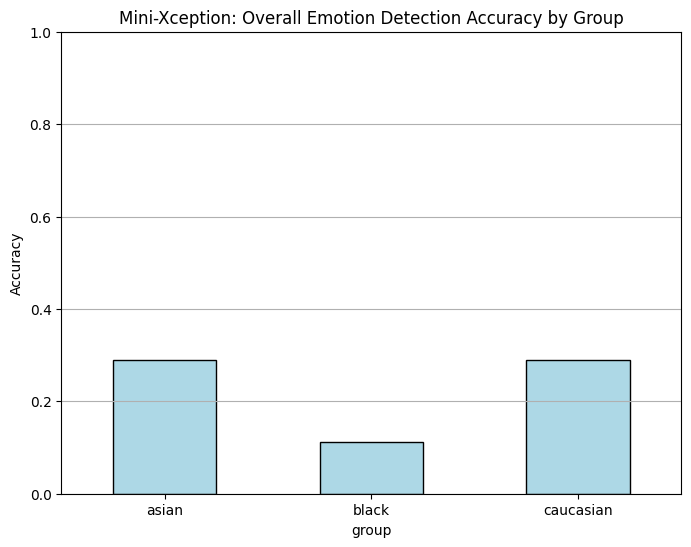

In [ ]:
# 計算每個 group 的總體準確率
overall_accuracy_mini = df_mini.groupby('group').apply(
    lambda x: (x['true_emotion'] == x['predicted_emotion']).mean()
)

# 畫出 bar chart
plt.figure(figsize=(8, 6))
overall_accuracy_mini.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Mini-Xception: Overall Emotion Detection Accuracy by Group')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [ ]:
from deepface import DeepFace
import pandas as pd
import os
from tqdm import tqdm

# 設定你的資料夾
root_folder = './'
groups = ['caucasian', 'asian', 'black']

results = []

for group in groups:
    folder = os.path.join(root_folder, group)
    for file in tqdm(os.listdir(folder), desc=f'Processing {group}'):
        if file.endswith('.jpg') or file.endswith('.png'):
            filepath = os.path.join(folder, file)

            try:
                prediction = DeepFace.analyze(filepath, actions=['emotion'], enforce_detection=False, detector_backend='opencv')

                # 取出最大情緒
                pred_emotion = prediction['dominant_emotion']

                # 從檔名判斷正確答案
                true_label = None
                for emo in ['happy', 'sad', 'angry']:
                    if emo in file.lower():
                        true_label = emo
                        break

                if true_label is not None:
                    results.append({
                        'group': group,
                        'true_emotion': true_label,
                        'predicted_emotion': pred_emotion.lower()
                    })
            except Exception as e:
                print(f"Error processing {filepath}: {e}")

# 整理成DataFrame
df_ferplus = pd.DataFrame(results)

# 看一下結果
df_ferplus.head()


Processing caucasian:   4%|▍         | 2/45 [00:00<00:08,  4.88it/s]

Error processing ./caucasian/angry8.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/happy12.jpg: list indices must be integers or slices, not str


Processing caucasian:  11%|█         | 5/45 [00:00<00:04,  8.07it/s]

Error processing ./caucasian/angry2.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/angry11.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/sad7.jpg: list indices must be integers or slices, not str


Processing caucasian:  16%|█▌        | 7/45 [00:01<00:05,  7.22it/s]

Error processing ./caucasian/happy15.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/sad13.jpg: list indices must be integers or slices, not str


Processing caucasian:  20%|██        | 9/45 [00:01<00:04,  7.39it/s]

Error processing ./caucasian/happy4.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/angry6.jpg: list indices must be integers or slices, not str


Processing caucasian:  22%|██▏       | 10/45 [00:01<00:04,  7.88it/s]

Error processing ./caucasian/angry5.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/angry14.jpg: list indices must be integers or slices, not str


Processing caucasian:  29%|██▉       | 13/45 [00:01<00:03,  8.54it/s]

Error processing ./caucasian/happy8.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/happy13.jpg: list indices must be integers or slices, not str


Processing caucasian:  36%|███▌      | 16/45 [00:02<00:02,  9.99it/s]

Error processing ./caucasian/happy5.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/angry15.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/sad1.jpg: list indices must be integers or slices, not str


Processing caucasian:  42%|████▏     | 19/45 [00:02<00:02, 10.64it/s]

Error processing ./caucasian/happy14.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/sad6.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/sad5.jpg: list indices must be integers or slices, not str


Processing caucasian:  47%|████▋     | 21/45 [00:02<00:02, 10.76it/s]

Error processing ./caucasian/sad12.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/angry1.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/angry9.jpg: list indices must be integers or slices, not str


Processing caucasian:  56%|█████▌    | 25/45 [00:02<00:01, 11.17it/s]

Error processing ./caucasian/happy10.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/sad3.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/happy9.jpg: list indices must be integers or slices, not str


Processing caucasian:  64%|██████▍   | 29/45 [00:03<00:01, 12.55it/s]

Error processing ./caucasian/happy6.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/sad10.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/sad8.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/angry12.jpg: list indices must be integers or slices, not str


Processing caucasian:  69%|██████▉   | 31/45 [00:03<00:01, 11.43it/s]

Error processing ./caucasian/sad4.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/happy7.jpg: list indices must be integers or slices, not str


Processing caucasian:  73%|███████▎  | 33/45 [00:03<00:01, 10.86it/s]

Error processing ./caucasian/angry7.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/angry4.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/happy2.jpg: list indices must be integers or slices, not str


Processing caucasian:  78%|███████▊  | 35/45 [00:03<00:00, 10.52it/s]

Error processing ./caucasian/sad11.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/angry10.jpg: list indices must be integers or slices, not str


Processing caucasian:  87%|████████▋ | 39/45 [00:04<00:00, 11.07it/s]

Error processing ./caucasian/angry3.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/happy1.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/sad14.jpg: list indices must be integers or slices, not str


Processing caucasian:  91%|█████████ | 41/45 [00:04<00:00, 11.39it/s]

Error processing ./caucasian/happy11.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/sad2.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/angry13.jpg: list indices must be integers or slices, not str


Processing caucasian: 100%|██████████| 45/45 [00:04<00:00,  9.76it/s]


Error processing ./caucasian/happy3.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/sad15.jpg: list indices must be integers or slices, not str
Error processing ./caucasian/sad9.jpg: list indices must be integers or slices, not str


Processing asian:   4%|▍         | 2/45 [00:00<00:03, 12.82it/s]

Error processing ./asian/angry8.jpg: list indices must be integers or slices, not str
Error processing ./asian/happy12.jpg: list indices must be integers or slices, not str


Processing asian:   9%|▉         | 4/45 [00:00<00:04,  9.68it/s]

Error processing ./asian/angry2.jpg: list indices must be integers or slices, not str
Error processing ./asian/angry11.jpg: list indices must be integers or slices, not str


Processing asian:  13%|█▎        | 6/45 [00:00<00:03, 10.11it/s]

Error processing ./asian/sad7.jpg: list indices must be integers or slices, not str
Error processing ./asian/happy15.jpg: list indices must be integers or slices, not str
Error processing ./asian/sad13.jpg: list indices must be integers or slices, not str


Processing asian:  22%|██▏       | 10/45 [00:00<00:02, 11.90it/s]

Error processing ./asian/happy4.jpg: list indices must be integers or slices, not str
Error processing ./asian/angry6.jpg: list indices must be integers or slices, not str
Error processing ./asian/angry5.jpg: list indices must be integers or slices, not str


Processing asian:  27%|██▋       | 12/45 [00:01<00:03, 10.94it/s]

Error processing ./asian/angry14.jpg: list indices must be integers or slices, not str
Error processing ./asian/happy8.jpg: list indices must be integers or slices, not str


Processing asian:  31%|███       | 14/45 [00:01<00:02, 10.45it/s]

Error processing ./asian/happy13.jpg: list indices must be integers or slices, not str
Error processing ./asian/happy5.jpg: list indices must be integers or slices, not str


Processing asian:  36%|███▌      | 16/45 [00:01<00:02,  9.76it/s]

Error processing ./asian/angry15.jpg: list indices must be integers or slices, not str
Error processing ./asian/sad1.jpg: list indices must be integers or slices, not str


Processing asian:  40%|████      | 18/45 [00:01<00:02, 10.37it/s]

Error processing ./asian/happy14.jpg: list indices must be integers or slices, not str
Error processing ./asian/sad6.jpg: list indices must be integers or slices, not str
Error processing ./asian/sad5.jpg: list indices must be integers or slices, not str


Processing asian:  44%|████▍     | 20/45 [00:01<00:02, 10.47it/s]

Error processing ./asian/sad12.jpg: list indices must be integers or slices, not str
Error processing ./asian/angry1.jpg: list indices must be integers or slices, not str


Processing asian:  53%|█████▎    | 24/45 [00:02<00:01, 10.90it/s]

Error processing ./asian/angry9.jpg: list indices must be integers or slices, not str
Error processing ./asian/happy10.jpg: list indices must be integers or slices, not str
Error processing ./asian/sad3.jpg: list indices must be integers or slices, not str
Error processing ./asian/happy9.jpg: list indices must be integers or slices, not str


Processing asian:  62%|██████▏   | 28/45 [00:02<00:01, 11.44it/s]

Error processing ./asian/happy6.jpg: list indices must be integers or slices, not str
Error processing ./asian/sad10.jpg: list indices must be integers or slices, not str
Error processing ./asian/sad8.jpg: list indices must be integers or slices, not str


Processing asian:  67%|██████▋   | 30/45 [00:02<00:01, 11.64it/s]

Error processing ./asian/angry12.jpg: list indices must be integers or slices, not str
Error processing ./asian/sad4.jpg: list indices must be integers or slices, not str
Error processing ./asian/happy7.jpg: list indices must be integers or slices, not str


Processing asian:  76%|███████▌  | 34/45 [00:03<00:00, 13.01it/s]

Error processing ./asian/angry7.jpg: list indices must be integers or slices, not str
Error processing ./asian/angry4.jpg: list indices must be integers or slices, not str
Error processing ./asian/happy2.jpg: list indices must be integers or slices, not str
Error processing ./asian/sad11.jpg: list indices must be integers or slices, not str


Processing asian:  80%|████████  | 36/45 [00:03<00:00, 12.71it/s]

Error processing ./asian/angry10.jpg: list indices must be integers or slices, not str
Error processing ./asian/angry3.jpg: list indices must be integers or slices, not str


Processing asian:  89%|████████▉ | 40/45 [00:03<00:00, 10.80it/s]

Error processing ./asian/happy1.jpg: list indices must be integers or slices, not str
Error processing ./asian/sad14.jpg: list indices must be integers or slices, not str
Error processing ./asian/happy11.jpg: list indices must be integers or slices, not str


Processing asian:  93%|█████████▎| 42/45 [00:03<00:00, 11.48it/s]

Error processing ./asian/sad2.jpg: list indices must be integers or slices, not str
Error processing ./asian/angry13.jpg: list indices must be integers or slices, not str


Processing asian: 100%|██████████| 45/45 [00:04<00:00, 11.06it/s]


Error processing ./asian/happy3.jpg: list indices must be integers or slices, not str
Error processing ./asian/sad15.jpg: list indices must be integers or slices, not str
Error processing ./asian/sad9.jpg: list indices must be integers or slices, not str


Processing black:   9%|▉         | 4/45 [00:00<00:03, 13.63it/s]

Error processing ./black/angry8.jpg: list indices must be integers or slices, not str
Error processing ./black/happy12.jpg: list indices must be integers or slices, not str
Error processing ./black/angry2.jpg: list indices must be integers or slices, not str
Error processing ./black/angry11.jpg: list indices must be integers or slices, not str


Processing black:  13%|█▎        | 6/45 [00:00<00:02, 13.91it/s]

Error processing ./black/sad7.jpg: list indices must be integers or slices, not str
Error processing ./black/happy15.jpg: list indices must be integers or slices, not str
Error processing ./black/sad13.jpg: list indices must be integers or slices, not str


Processing black:  22%|██▏       | 10/45 [00:00<00:02, 13.10it/s]

Error processing ./black/happy4.jpg: list indices must be integers or slices, not str
Error processing ./black/angry6.jpg: list indices must be integers or slices, not str
Error processing ./black/angry5.jpg: list indices must be integers or slices, not str


Processing black:  31%|███       | 14/45 [00:01<00:02, 13.79it/s]

Error processing ./black/angry14.jpg: list indices must be integers or slices, not str
Error processing ./black/happy8.jpg: list indices must be integers or slices, not str
Error processing ./black/happy13.jpg: list indices must be integers or slices, not str
Error processing ./black/happy5.jpg: list indices must be integers or slices, not str


Processing black:  40%|████      | 18/45 [00:01<00:01, 15.23it/s]

Error processing ./black/angry15.jpg: list indices must be integers or slices, not str
Error processing ./black/sad1.jpg: list indices must be integers or slices, not str
Error processing ./black/happy14.jpg: list indices must be integers or slices, not str
Error processing ./black/sad6.jpg: list indices must be integers or slices, not str


Processing black:  44%|████▍     | 20/45 [00:01<00:01, 14.26it/s]

Error processing ./black/sad5.jpg: list indices must be integers or slices, not str
Error processing ./black/sad12.jpg: list indices must be integers or slices, not str
Error processing ./black/angry1.jpg: list indices must be integers or slices, not str


Processing black:  49%|████▉     | 22/45 [00:01<00:01, 14.24it/s]

Error processing ./black/angry9.jpg: list indices must be integers or slices, not str
Error processing ./black/happy10.jpg: list indices must be integers or slices, not str


Processing black:  53%|█████▎    | 24/45 [00:01<00:01, 11.89it/s]

Error processing ./black/sad3.jpg: list indices must be integers or slices, not str
Error processing ./black/happy9.jpg: list indices must be integers or slices, not str


Processing black:  62%|██████▏   | 28/45 [00:02<00:01, 10.01it/s]

Error processing ./black/happy6.jpg: list indices must be integers or slices, not str
Error processing ./black/sad10.jpg: list indices must be integers or slices, not str
Error processing ./black/sad8.jpg: list indices must be integers or slices, not str


Processing black:  67%|██████▋   | 30/45 [00:02<00:01,  9.37it/s]

Error processing ./black/angry12.jpg: list indices must be integers or slices, not str
Error processing ./black/sad4.jpg: list indices must be integers or slices, not str


Processing black:  71%|███████   | 32/45 [00:02<00:01,  8.41it/s]

Error processing ./black/happy7.jpg: list indices must be integers or slices, not str
Error processing ./black/angry7.jpg: list indices must be integers or slices, not str
Error processing ./black/angry4.jpg: list indices must be integers or slices, not str


Processing black:  76%|███████▌  | 34/45 [00:03<00:01,  9.06it/s]

Error processing ./black/happy2.jpg: list indices must be integers or slices, not str
Error processing ./black/sad11.jpg: list indices must be integers or slices, not str


Processing black:  82%|████████▏ | 37/45 [00:03<00:00,  8.62it/s]

Error processing ./black/angry10.jpg: list indices must be integers or slices, not str
Error processing ./black/angry3.jpg: list indices must be integers or slices, not str


Processing black:  89%|████████▉ | 40/45 [00:03<00:00,  9.47it/s]

Error processing ./black/happy1.jpg: list indices must be integers or slices, not str
Error processing ./black/sad14.jpg: list indices must be integers or slices, not str
Error processing ./black/happy11.jpg: list indices must be integers or slices, not str


Processing black:  93%|█████████▎| 42/45 [00:04<00:00,  8.42it/s]

Error processing ./black/sad2.jpg: list indices must be integers or slices, not str
Error processing ./black/angry13.jpg: list indices must be integers or slices, not str


Processing black: 100%|██████████| 45/45 [00:04<00:00, 10.23it/s]

Error processing ./black/happy3.jpg: list indices must be integers or slices, not str
Error processing ./black/sad15.jpg: list indices must be integers or slices, not str
Error processing ./black/sad9.jpg: list indices must be integers or slices, not str


""


In [ ]:
from deepface import DeepFace
import pandas as pd
import os
from tqdm import tqdm

# 設定你的資料夾
root_folder = './'
groups = ['caucasian', 'asian', 'black']

results = []

for group in groups:
    folder = os.path.join(root_folder, group)
    # Print the folder path to check if it is correct
    print(f"Processing folder: {folder}")
    for file in tqdm(os.listdir(folder), desc=f'Processing {group}'):
        if file.endswith('.jpg') or file.endswith('.png'):
            filepath = os.path.join(folder, file)

            # Print the filepath to check if files are being found
            print(f"Processing file: {filepath}")
from deepface import DeepFace
import pandas as pd
import os
from tqdm import tqdm

# 設定你的資料夾
root_folder = './'
groups = ['caucasian', 'asian', 'black']

results = []

for group in groups:
    folder = os.path.join(root_folder, group)
    # Print the folder path to check if it is correct
    print(f"Processing folder: {folder}")
    for file in tqdm(os.listdir(folder), desc=f'Processing {group}'):
        if file.endswith('.jpg') or file.endswith('.png'):
            filepath = os.path.join(folder, file)

            # Print the filepath to check if files are being found
            print(f"Processing file: {filepath}")
            try:
                prediction = DeepFace.analyze(filepath, actions=['emotion'], enforce_detection=False, detector_backend='opencv')

                # 取出最大情緒
                pred_emotion = max(prediction[0]['emotion'], key=prediction[0]['emotion'].get)
                results.append([group, file, pred_emotion])
            except Exception as e:
                print(f"Error processing {filepath}: {e}")
                results.append([group, file, "Error"])
                continue
df = pd.DataFrame(results, columns=['race', 'file', 'emotion'])
print(df)
from tqdm import tqdm

# 設定你的資料夾
root_folder = './'
groups = ['caucasian', 'asian', 'black']

results = []

for group in groups:
    folder = os.path.join(root_folder, group)
    # Print the folder path to check if it is correct
    print(f"Processing folder: {folder}")
    for file in tqdm(os.listdir(folder), desc=f'Processing {group}'):
        if file.endswith('.jpg') or file.endswith('.png'):
            filepath = os.path.join(folder, file)

            # Print the filepath to check if files are being found
            print(f"Processing file: {filepath}")
            try:
                prediction = DeepFace.analyze(filepath, actions=['emotion'], enforce_detection=False, detector_backend='opencv')

                # 取出最大情緒
                pred_emotion = max(prediction[0]['emotion'], key=prediction[0]['emotion'].get)
                results.append([group, file, pred_emotion])
            except Exception as e:
                print(f"Error processing {filepath}: {e}")
                results.append([group, file, "Error"])
                continue
df = pd.DataFrame(results, columns=['race', 'file', 'emotion'])
print(df)

Processing folder: ./caucasian


Processing caucasian: 100%|██████████| 45/45 [00:00<00:00, 89579.35it/s]


Processing file: ./caucasian/angry8.jpg
Processing file: ./caucasian/happy12.jpg
Processing file: ./caucasian/angry2.jpg
Processing file: ./caucasian/angry11.jpg
Processing file: ./caucasian/sad7.jpg
Processing file: ./caucasian/happy15.jpg
Processing file: ./caucasian/sad13.jpg
Processing file: ./caucasian/happy4.jpg
Processing file: ./caucasian/angry6.jpg
Processing file: ./caucasian/angry5.jpg
Processing file: ./caucasian/angry14.jpg
Processing file: ./caucasian/happy8.jpg
Processing file: ./caucasian/happy13.jpg
Processing file: ./caucasian/happy5.jpg
Processing file: ./caucasian/angry15.jpg
Processing file: ./caucasian/sad1.jpg
Processing file: ./caucasian/happy14.jpg
Processing file: ./caucasian/sad6.jpg
Processing file: ./caucasian/sad5.jpg
Processing file: ./caucasian/sad12.jpg
Processing file: ./caucasian/angry1.jpg
Processing file: ./caucasian/angry9.jpg
Processing file: ./caucasian/happy10.jpg
Processing file: ./caucasian/sad3.jpg
Processing file: ./caucasian/happy9.jpg
Proc

Processing asian: 100%|██████████| 45/45 [00:00<00:00, 76014.37it/s]


Processing file: ./asian/angry8.jpg
Processing file: ./asian/happy12.jpg
Processing file: ./asian/angry2.jpg
Processing file: ./asian/angry11.jpg
Processing file: ./asian/sad7.jpg
Processing file: ./asian/happy15.jpg
Processing file: ./asian/sad13.jpg
Processing file: ./asian/happy4.jpg
Processing file: ./asian/angry6.jpg
Processing file: ./asian/angry5.jpg
Processing file: ./asian/angry14.jpg
Processing file: ./asian/happy8.jpg
Processing file: ./asian/happy13.jpg
Processing file: ./asian/happy5.jpg
Processing file: ./asian/angry15.jpg
Processing file: ./asian/sad1.jpg
Processing file: ./asian/happy14.jpg
Processing file: ./asian/sad6.jpg
Processing file: ./asian/sad5.jpg
Processing file: ./asian/sad12.jpg
Processing file: ./asian/angry1.jpg
Processing file: ./asian/angry9.jpg
Processing file: ./asian/happy10.jpg
Processing file: ./asian/sad3.jpg
Processing file: ./asian/happy9.jpg
Processing file: ./asian/happy6.jpg
Processing file: ./asian/sad10.jpg
Processing file: ./asian/sad8.jpg

Processing black: 100%|██████████| 45/45 [00:00<00:00, 84373.57it/s]


Processing file: ./black/angry8.jpg
Processing file: ./black/happy12.jpg
Processing file: ./black/angry2.jpg
Processing file: ./black/angry11.jpg
Processing file: ./black/sad7.jpg
Processing file: ./black/happy15.jpg
Processing file: ./black/sad13.jpg
Processing file: ./black/happy4.jpg
Processing file: ./black/angry6.jpg
Processing file: ./black/angry5.jpg
Processing file: ./black/angry14.jpg
Processing file: ./black/happy8.jpg
Processing file: ./black/happy13.jpg
Processing file: ./black/happy5.jpg
Processing file: ./black/angry15.jpg
Processing file: ./black/sad1.jpg
Processing file: ./black/happy14.jpg
Processing file: ./black/sad6.jpg
Processing file: ./black/sad5.jpg
Processing file: ./black/sad12.jpg
Processing file: ./black/angry1.jpg
Processing file: ./black/angry9.jpg
Processing file: ./black/happy10.jpg
Processing file: ./black/sad3.jpg
Processing file: ./black/happy9.jpg
Processing file: ./black/happy6.jpg
Processing file: ./black/sad10.jpg
Processing file: ./black/sad8.jpg

Processing caucasian:   2%|▏         | 1/45 [00:00<00:07,  6.08it/s]

Processing file: ./caucasian/angry8.jpg
Processing file: ./caucasian/happy12.jpg


Processing caucasian:   7%|▋         | 3/45 [00:00<00:06,  6.57it/s]

Processing file: ./caucasian/angry2.jpg
Processing file: ./caucasian/angry11.jpg


Processing caucasian:  11%|█         | 5/45 [00:00<00:04,  9.14it/s]

Processing file: ./caucasian/sad7.jpg
Processing file: ./caucasian/happy15.jpg


Processing caucasian:  18%|█▊        | 8/45 [00:00<00:03,  9.45it/s]

Processing file: ./caucasian/sad13.jpg
Processing file: ./caucasian/happy4.jpg
Processing file: ./caucasian/angry6.jpg


Processing caucasian:  22%|██▏       | 10/45 [00:01<00:03,  9.29it/s]

Processing file: ./caucasian/angry5.jpg
Processing file: ./caucasian/angry14.jpg


Processing caucasian:  27%|██▋       | 12/45 [00:01<00:03,  9.07it/s]

Processing file: ./caucasian/happy8.jpg
Processing file: ./caucasian/happy13.jpg


Processing caucasian:  31%|███       | 14/45 [00:01<00:03,  8.66it/s]

Processing file: ./caucasian/happy5.jpg
Processing file: ./caucasian/angry15.jpg
Processing file: ./caucasian/sad1.jpg


Processing caucasian:  40%|████      | 18/45 [00:01<00:02, 11.24it/s]

Processing file: ./caucasian/happy14.jpg
Processing file: ./caucasian/sad6.jpg
Processing file: ./caucasian/sad5.jpg


Processing caucasian:  44%|████▍     | 20/45 [00:02<00:02, 10.52it/s]

Processing file: ./caucasian/sad12.jpg
Processing file: ./caucasian/angry1.jpg
Processing file: ./caucasian/angry9.jpg


Processing caucasian:  53%|█████▎    | 24/45 [00:02<00:01, 10.98it/s]

Processing file: ./caucasian/happy10.jpg
Processing file: ./caucasian/sad3.jpg
Processing file: ./caucasian/happy9.jpg


Processing caucasian:  62%|██████▏   | 28/45 [00:02<00:01, 12.41it/s]

Processing file: ./caucasian/happy6.jpg
Processing file: ./caucasian/sad10.jpg
Processing file: ./caucasian/sad8.jpg
Processing file: ./caucasian/angry12.jpg


Processing caucasian:  67%|██████▋   | 30/45 [00:03<00:01, 10.41it/s]

Processing file: ./caucasian/sad4.jpg
Processing file: ./caucasian/happy7.jpg


Processing caucasian:  71%|███████   | 32/45 [00:03<00:01,  8.99it/s]

Processing file: ./caucasian/angry7.jpg
Processing file: ./caucasian/angry4.jpg


Processing caucasian:  76%|███████▌  | 34/45 [00:03<00:01,  9.15it/s]

Processing file: ./caucasian/happy2.jpg
Processing file: ./caucasian/sad11.jpg


Processing caucasian:  80%|████████  | 36/45 [00:03<00:01,  7.72it/s]

Processing file: ./caucasian/angry10.jpg


Processing caucasian:  82%|████████▏ | 37/45 [00:04<00:01,  6.99it/s]

Processing file: ./caucasian/angry3.jpg
Processing file: ./caucasian/happy1.jpg


Processing caucasian:  87%|████████▋ | 39/45 [00:04<00:00,  7.22it/s]

Processing file: ./caucasian/sad14.jpg
Processing file: ./caucasian/happy11.jpg


Processing caucasian:  91%|█████████ | 41/45 [00:04<00:00,  6.54it/s]

Processing file: ./caucasian/sad2.jpg
Processing file: ./caucasian/angry13.jpg


Processing caucasian:  96%|█████████▌| 43/45 [00:05<00:00,  6.00it/s]

Processing file: ./caucasian/happy3.jpg
Processing file: ./caucasian/sad15.jpg


Processing caucasian: 100%|██████████| 45/45 [00:05<00:00,  8.32it/s]


Processing file: ./caucasian/sad9.jpg
Processing folder: ./asian


Processing asian:   0%|          | 0/45 [00:00<?, ?it/s]

Processing file: ./asian/angry8.jpg


Processing asian:   2%|▏         | 1/45 [00:00<00:05,  7.99it/s]

Processing file: ./asian/happy12.jpg


Processing asian:   4%|▍         | 2/45 [00:00<00:06,  6.28it/s]

Processing file: ./asian/angry2.jpg


Processing asian:   7%|▋         | 3/45 [00:00<00:07,  5.54it/s]

Processing file: ./asian/angry11.jpg


Processing asian:  11%|█         | 5/45 [00:00<00:07,  5.46it/s]

Processing file: ./asian/sad7.jpg
Processing file: ./asian/happy15.jpg


Processing asian:  16%|█▌        | 7/45 [00:01<00:07,  5.25it/s]

Processing file: ./asian/sad13.jpg
Processing file: ./asian/happy4.jpg


Processing asian:  20%|██        | 9/45 [00:01<00:06,  5.49it/s]

Processing file: ./asian/angry6.jpg
Processing file: ./asian/angry5.jpg


Processing asian:  22%|██▏       | 10/45 [00:01<00:05,  6.15it/s]

Processing file: ./asian/angry14.jpg


Processing asian:  27%|██▋       | 12/45 [00:02<00:06,  5.03it/s]

Processing file: ./asian/happy8.jpg
Processing file: ./asian/happy13.jpg


Processing asian:  31%|███       | 14/45 [00:02<00:06,  5.09it/s]

Processing file: ./asian/happy5.jpg
Processing file: ./asian/angry15.jpg


Processing asian:  36%|███▌      | 16/45 [00:03<00:05,  5.16it/s]

Processing file: ./asian/sad1.jpg
Processing file: ./asian/happy14.jpg


Processing asian:  42%|████▏     | 19/45 [00:03<00:04,  6.34it/s]

Processing file: ./asian/sad6.jpg
Processing file: ./asian/sad5.jpg
Processing file: ./asian/sad12.jpg


Processing asian:  44%|████▍     | 20/45 [00:03<00:04,  6.18it/s]

Processing file: ./asian/angry1.jpg


Processing asian:  47%|████▋     | 21/45 [00:03<00:04,  5.10it/s]

Processing file: ./asian/angry9.jpg


Processing asian:  49%|████▉     | 22/45 [00:04<00:04,  4.84it/s]

Processing file: ./asian/happy10.jpg
Processing file: ./asian/sad3.jpg


Processing asian:  53%|█████▎    | 24/45 [00:04<00:03,  5.96it/s]

Processing file: ./asian/happy9.jpg
Processing file: ./asian/happy6.jpg


Processing asian:  60%|██████    | 27/45 [00:04<00:02,  6.73it/s]

Processing file: ./asian/sad10.jpg
Processing file: ./asian/sad8.jpg


Processing asian:  64%|██████▍   | 29/45 [00:05<00:02,  6.32it/s]

Processing file: ./asian/angry12.jpg
Processing file: ./asian/sad4.jpg


Processing asian:  67%|██████▋   | 30/45 [00:05<00:02,  6.63it/s]

Processing file: ./asian/happy7.jpg


Processing asian:  69%|██████▉   | 31/45 [00:05<00:02,  5.80it/s]

Processing file: ./asian/angry7.jpg


Processing asian:  73%|███████▎  | 33/45 [00:05<00:02,  5.64it/s]

Processing file: ./asian/angry4.jpg
Processing file: ./asian/happy2.jpg


Processing asian:  78%|███████▊  | 35/45 [00:06<00:01,  5.32it/s]

Processing file: ./asian/sad11.jpg
Processing file: ./asian/angry10.jpg


Processing asian:  80%|████████  | 36/45 [00:06<00:01,  4.89it/s]

Processing file: ./asian/angry3.jpg


Processing asian:  82%|████████▏ | 37/45 [00:06<00:02,  3.96it/s]

Processing file: ./asian/happy1.jpg


Processing asian:  84%|████████▍ | 38/45 [00:07<00:02,  3.10it/s]

Processing file: ./asian/sad14.jpg


Processing asian:  87%|████████▋ | 39/45 [00:07<00:01,  3.07it/s]

Processing file: ./asian/happy11.jpg


Processing asian:  91%|█████████ | 41/45 [00:08<00:01,  3.61it/s]

Processing file: ./asian/sad2.jpg
Processing file: ./asian/angry13.jpg


Processing asian:  93%|█████████▎| 42/45 [00:08<00:00,  4.06it/s]

Processing file: ./asian/happy3.jpg


Processing asian:  98%|█████████▊| 44/45 [00:08<00:00,  4.51it/s]

Processing file: ./asian/sad15.jpg
Processing file: ./asian/sad9.jpg


Processing asian: 100%|██████████| 45/45 [00:08<00:00,  5.05it/s]


Processing folder: ./black


Processing black:   0%|          | 0/45 [00:00<?, ?it/s]

Processing file: ./black/angry8.jpg


Processing black:   4%|▍         | 2/45 [00:00<00:08,  5.28it/s]

Processing file: ./black/happy12.jpg
Processing file: ./black/angry2.jpg


Processing black:   7%|▋         | 3/45 [00:00<00:06,  6.19it/s]

Processing file: ./black/angry11.jpg


Processing black:  11%|█         | 5/45 [00:00<00:06,  6.16it/s]

Processing file: ./black/sad7.jpg
Processing file: ./black/happy15.jpg


Processing black:  13%|█▎        | 6/45 [00:00<00:05,  6.89it/s]

Processing file: ./black/sad13.jpg
Processing file: ./black/happy4.jpg


Processing black:  18%|█▊        | 8/45 [00:01<00:05,  7.02it/s]

Processing file: ./black/angry6.jpg


Processing black:  22%|██▏       | 10/45 [00:01<00:05,  6.74it/s]

Processing file: ./black/angry5.jpg
Processing file: ./black/angry14.jpg


Processing black:  27%|██▋       | 12/45 [00:02<00:05,  5.77it/s]

Processing file: ./black/happy8.jpg
Processing file: ./black/happy13.jpg
Processing file: ./black/happy5.jpg


Processing black:  36%|███▌      | 16/45 [00:02<00:02, 10.15it/s]

Processing file: ./black/angry15.jpg
Processing file: ./black/sad1.jpg
Processing file: ./black/happy14.jpg
Processing file: ./black/sad6.jpg


Processing black:  44%|████▍     | 20/45 [00:02<00:01, 12.74it/s]

Processing file: ./black/sad5.jpg
Processing file: ./black/sad12.jpg
Processing file: ./black/angry1.jpg
Processing file: ./black/angry9.jpg


Processing black:  53%|█████▎    | 24/45 [00:02<00:01, 12.39it/s]

Processing file: ./black/happy10.jpg
Processing file: ./black/sad3.jpg
Processing file: ./black/happy9.jpg


Processing black:  62%|██████▏   | 28/45 [00:03<00:01, 13.46it/s]

Processing file: ./black/happy6.jpg
Processing file: ./black/sad10.jpg
Processing file: ./black/sad8.jpg
Processing file: ./black/angry12.jpg


Processing black:  67%|██████▋   | 30/45 [00:03<00:01, 13.83it/s]

Processing file: ./black/sad4.jpg
Processing file: ./black/happy7.jpg
Processing file: ./black/angry7.jpg


Processing black:  76%|███████▌  | 34/45 [00:03<00:00, 13.60it/s]

Processing file: ./black/angry4.jpg
Processing file: ./black/happy2.jpg
Processing file: ./black/sad11.jpg
Processing file: ./black/angry10.jpg


Processing black:  84%|████████▍ | 38/45 [00:03<00:00, 12.89it/s]

Processing file: ./black/angry3.jpg
Processing file: ./black/happy1.jpg
Processing file: ./black/sad14.jpg


Processing black:  91%|█████████ | 41/45 [00:04<00:00, 13.67it/s]

Processing file: ./black/happy11.jpg
Processing file: ./black/sad2.jpg
Processing file: ./black/angry13.jpg


Processing black:  96%|█████████▌| 43/45 [00:04<00:00, 13.36it/s]

Processing file: ./black/happy3.jpg
Processing file: ./black/sad15.jpg
Processing file: ./black/sad9.jpg


Processing black: 100%|██████████| 45/45 [00:04<00:00, 10.31it/s]


          race         file   emotion
0    caucasian   angry8.jpg  surprise
1    caucasian  happy12.jpg     happy
2    caucasian   angry2.jpg     angry
3    caucasian  angry11.jpg     angry
4    caucasian     sad7.jpg      fear
..         ...          ...       ...
130      black     sad2.jpg   neutral
131      black  angry13.jpg   disgust
132      black   happy3.jpg     happy
133      black    sad15.jpg  surprise
134      black     sad9.jpg      fear

[135 rows x 3 columns]
Processing folder: ./caucasian


Processing caucasian:   0%|          | 0/45 [00:00<?, ?it/s]

Processing file: ./caucasian/angry8.jpg
Processing file: ./caucasian/happy12.jpg


Processing caucasian:   9%|▉         | 4/45 [00:00<00:03, 12.55it/s]

Processing file: ./caucasian/angry2.jpg
Processing file: ./caucasian/angry11.jpg
Processing file: ./caucasian/sad7.jpg
Processing file: ./caucasian/happy15.jpg


Processing caucasian:  18%|█▊        | 8/45 [00:00<00:03, 12.06it/s]

Processing file: ./caucasian/sad13.jpg
Processing file: ./caucasian/happy4.jpg
Processing file: ./caucasian/angry6.jpg


Processing caucasian:  22%|██▏       | 10/45 [00:00<00:03, 10.81it/s]

Processing file: ./caucasian/angry5.jpg
Processing file: ./caucasian/angry14.jpg
Processing file: ./caucasian/happy8.jpg


Processing caucasian:  27%|██▋       | 12/45 [00:01<00:03, 10.33it/s]

Processing file: ./caucasian/happy13.jpg
Processing file: ./caucasian/happy5.jpg


Processing caucasian:  36%|███▌      | 16/45 [00:01<00:02, 10.49it/s]

Processing file: ./caucasian/angry15.jpg
Processing file: ./caucasian/sad1.jpg
Processing file: ./caucasian/happy14.jpg


Processing caucasian:  40%|████      | 18/45 [00:01<00:02, 11.19it/s]

Processing file: ./caucasian/sad6.jpg
Processing file: ./caucasian/sad5.jpg
Processing file: ./caucasian/sad12.jpg


Processing caucasian:  49%|████▉     | 22/45 [00:02<00:02, 10.56it/s]

Processing file: ./caucasian/angry1.jpg
Processing file: ./caucasian/angry9.jpg
Processing file: ./caucasian/happy10.jpg


Processing caucasian:  53%|█████▎    | 24/45 [00:02<00:01, 11.49it/s]

Processing file: ./caucasian/sad3.jpg
Processing file: ./caucasian/happy9.jpg
Processing file: ./caucasian/happy6.jpg


Processing caucasian:  62%|██████▏   | 28/45 [00:02<00:01, 12.79it/s]

Processing file: ./caucasian/sad10.jpg
Processing file: ./caucasian/sad8.jpg
Processing file: ./caucasian/angry12.jpg


Processing caucasian:  67%|██████▋   | 30/45 [00:02<00:01, 11.67it/s]

Processing file: ./caucasian/sad4.jpg
Processing file: ./caucasian/happy7.jpg


Processing caucasian:  71%|███████   | 32/45 [00:02<00:01, 10.69it/s]

Processing file: ./caucasian/angry7.jpg
Processing file: ./caucasian/angry4.jpg


Processing caucasian:  76%|███████▌  | 34/45 [00:03<00:01, 10.38it/s]

Processing file: ./caucasian/happy2.jpg
Processing file: ./caucasian/sad11.jpg


Processing caucasian:  80%|████████  | 36/45 [00:03<00:00, 10.26it/s]

Processing file: ./caucasian/angry10.jpg
Processing file: ./caucasian/angry3.jpg


Processing caucasian:  84%|████████▍ | 38/45 [00:03<00:00, 10.01it/s]

Processing file: ./caucasian/happy1.jpg
Processing file: ./caucasian/sad14.jpg
Processing file: ./caucasian/happy11.jpg


Processing caucasian:  93%|█████████▎| 42/45 [00:03<00:00, 11.26it/s]

Processing file: ./caucasian/sad2.jpg
Processing file: ./caucasian/angry13.jpg
Processing file: ./caucasian/happy3.jpg


Processing caucasian: 100%|██████████| 45/45 [00:04<00:00, 10.97it/s]


Processing file: ./caucasian/sad15.jpg
Processing file: ./caucasian/sad9.jpg
Processing folder: ./asian


Processing asian:   0%|          | 0/45 [00:00<?, ?it/s]

Processing file: ./asian/angry8.jpg


Processing asian:   4%|▍         | 2/45 [00:00<00:03, 12.80it/s]

Processing file: ./asian/happy12.jpg
Processing file: ./asian/angry2.jpg


Processing asian:   9%|▉         | 4/45 [00:00<00:03, 10.36it/s]

Processing file: ./asian/angry11.jpg
Processing file: ./asian/sad7.jpg


Processing asian:  13%|█▎        | 6/45 [00:00<00:03, 10.30it/s]

Processing file: ./asian/happy15.jpg
Processing file: ./asian/sad13.jpg
Processing file: ./asian/happy4.jpg


Processing asian:  22%|██▏       | 10/45 [00:00<00:02, 11.85it/s]

Processing file: ./asian/angry6.jpg
Processing file: ./asian/angry5.jpg
Processing file: ./asian/angry14.jpg


Processing asian:  27%|██▋       | 12/45 [00:01<00:03,  9.64it/s]

Processing file: ./asian/happy8.jpg
Processing file: ./asian/happy13.jpg


Processing asian:  31%|███       | 14/45 [00:01<00:03,  7.89it/s]

Processing file: ./asian/happy5.jpg
Processing file: ./asian/angry15.jpg


Processing asian:  33%|███▎      | 15/45 [00:01<00:04,  7.39it/s]

Processing file: ./asian/sad1.jpg


Processing asian:  38%|███▊      | 17/45 [00:02<00:04,  6.32it/s]

Processing file: ./asian/happy14.jpg
Processing file: ./asian/sad6.jpg


Processing asian:  42%|████▏     | 19/45 [00:02<00:03,  7.09it/s]

Processing file: ./asian/sad5.jpg
Processing file: ./asian/sad12.jpg


Processing asian:  47%|████▋     | 21/45 [00:02<00:03,  6.16it/s]

Processing file: ./asian/angry1.jpg
Processing file: ./asian/angry9.jpg


Processing asian:  51%|█████     | 23/45 [00:02<00:03,  6.71it/s]

Processing file: ./asian/happy10.jpg
Processing file: ./asian/sad3.jpg


Processing asian:  56%|█████▌    | 25/45 [00:03<00:02,  7.23it/s]

Processing file: ./asian/happy9.jpg
Processing file: ./asian/happy6.jpg


Processing asian:  62%|██████▏   | 28/45 [00:03<00:01,  8.86it/s]

Processing file: ./asian/sad10.jpg
Processing file: ./asian/sad8.jpg
Processing file: ./asian/angry12.jpg


Processing asian:  69%|██████▉   | 31/45 [00:03<00:01, 10.20it/s]

Processing file: ./asian/sad4.jpg
Processing file: ./asian/happy7.jpg
Processing file: ./asian/angry7.jpg


Processing asian:  78%|███████▊  | 35/45 [00:04<00:00, 13.49it/s]

Processing file: ./asian/angry4.jpg
Processing file: ./asian/happy2.jpg
Processing file: ./asian/sad11.jpg
Processing file: ./asian/angry10.jpg


Processing asian:  82%|████████▏ | 37/45 [00:04<00:00, 11.55it/s]

Processing file: ./asian/angry3.jpg
Processing file: ./asian/happy1.jpg


Processing asian:  87%|████████▋ | 39/45 [00:04<00:00, 10.84it/s]

Processing file: ./asian/sad14.jpg
Processing file: ./asian/happy11.jpg
Processing file: ./asian/sad2.jpg


Processing asian:  91%|█████████ | 41/45 [00:04<00:00, 11.36it/s]

Processing file: ./asian/angry13.jpg
Processing file: ./asian/happy3.jpg


Processing asian: 100%|██████████| 45/45 [00:04<00:00,  9.02it/s]


Processing file: ./asian/sad15.jpg
Processing file: ./asian/sad9.jpg
Processing folder: ./black


Processing black:   0%|          | 0/45 [00:00<?, ?it/s]

Processing file: ./black/angry8.jpg


Processing black:   2%|▏         | 1/45 [00:00<00:05,  8.46it/s]

Processing file: ./black/happy12.jpg
Processing file: ./black/angry2.jpg


Processing black:   9%|▉         | 4/45 [00:00<00:03, 13.41it/s]

Processing file: ./black/angry11.jpg
Processing file: ./black/sad7.jpg
Processing file: ./black/happy15.jpg


Processing black:  13%|█▎        | 6/45 [00:00<00:02, 14.20it/s]

Processing file: ./black/sad13.jpg
Processing file: ./black/happy4.jpg


Processing black:  22%|██▏       | 10/45 [00:00<00:02, 12.31it/s]

Processing file: ./black/angry6.jpg
Processing file: ./black/angry5.jpg
Processing file: ./black/angry14.jpg


Processing black:  31%|███       | 14/45 [00:01<00:02, 13.43it/s]

Processing file: ./black/happy8.jpg
Processing file: ./black/happy13.jpg
Processing file: ./black/happy5.jpg
Processing file: ./black/angry15.jpg


Processing black:  40%|████      | 18/45 [00:01<00:01, 15.13it/s]

Processing file: ./black/sad1.jpg
Processing file: ./black/happy14.jpg
Processing file: ./black/sad6.jpg
Processing file: ./black/sad5.jpg


Processing black:  44%|████▍     | 20/45 [00:01<00:01, 14.67it/s]

Processing file: ./black/sad12.jpg
Processing file: ./black/angry1.jpg
Processing file: ./black/angry9.jpg


Processing black:  53%|█████▎    | 24/45 [00:01<00:01, 13.13it/s]

Processing file: ./black/happy10.jpg
Processing file: ./black/sad3.jpg
Processing file: ./black/happy9.jpg


Processing black:  58%|█████▊    | 26/45 [00:02<00:01, 12.09it/s]

Processing file: ./black/happy6.jpg
Processing file: ./black/sad10.jpg
Processing file: ./black/sad8.jpg


Processing black:  67%|██████▋   | 30/45 [00:02<00:01, 13.85it/s]

Processing file: ./black/angry12.jpg
Processing file: ./black/sad4.jpg
Processing file: ./black/happy7.jpg


Processing black:  76%|███████▌  | 34/45 [00:02<00:00, 13.53it/s]

Processing file: ./black/angry7.jpg
Processing file: ./black/angry4.jpg
Processing file: ./black/happy2.jpg
Processing file: ./black/sad11.jpg


Processing black:  80%|████████  | 36/45 [00:02<00:00, 13.68it/s]

Processing file: ./black/angry10.jpg
Processing file: ./black/angry3.jpg
Processing file: ./black/happy1.jpg


Processing black:  91%|█████████ | 41/45 [00:03<00:00, 13.79it/s]

Processing file: ./black/sad14.jpg
Processing file: ./black/happy11.jpg
Processing file: ./black/sad2.jpg
Processing file: ./black/angry13.jpg


Processing black:  96%|█████████▌| 43/45 [00:03<00:00, 13.49it/s]

Processing file: ./black/happy3.jpg
Processing file: ./black/sad15.jpg
Processing file: ./black/sad9.jpg


Processing black: 100%|██████████| 45/45 [00:03<00:00, 13.38it/s]

          race         file   emotion
0    caucasian   angry8.jpg  surprise
1    caucasian  happy12.jpg     happy
2    caucasian   angry2.jpg     angry
3    caucasian  angry11.jpg     angry
4    caucasian     sad7.jpg      fear
..         ...          ...       ...
130      black     sad2.jpg   neutral
131      black  angry13.jpg   disgust
132      black   happy3.jpg     happy
133      black    sad15.jpg  surprise
134      black     sad9.jpg      fear

[135 rows x 3 columns]


In [ ]:
from deepface import DeepFace
import pandas as pd
import os
from tqdm import tqdm

# 設定你的資料夾
root_folder = './'
groups = ['caucasian', 'asian', 'black']

results = []

for group in groups:
    folder = os.path.join(root_folder, group)
    for file in tqdm(os.listdir(folder), desc=f'Processing {group}'):
        if file.endswith('.jpg') or file.endswith('.png'):
            filepath = os.path

Processing black: 100%|██████████| 45/45 [00:00<00:00, 256445.22it/s]


In [ ]:
from deepface import DeepFace
import pandas as pd
import os
from tqdm import tqdm

# 設定資料夾
root_folder = './'
groups = ['caucasian', 'asian', 'black']
true_emotions = ['happy', 'sad', 'angry']

results = []

for group in groups:
    folder = os.path.join(root_folder, group)
    print(f"Processing group: {group}")
    for file in tqdm(os.listdir(folder), desc=f'Processing {group}'):
        if file.endswith('.jpg') or file.endswith('.png'):
            filepath = os.path.join(folder, file)
            try:
                prediction = DeepFace.analyze(filepath, actions=['emotion'], enforce_detection=False, detector_backend='opencv')

                # 抓預測結果
                pred_emotion = max(prediction[0]['emotion'], key=prediction[0]['emotion'].get)

                # 從檔案名稱推斷正確情緒
                true_label = None
                for emo in true_emotions:
                    if emo in file.lower():
                        true_label = emo
                        break

                if true_label is not None:
                    results.append({
                        'group': group,
                        'true_emotion': true_label,
                        'predicted_emotion': pred_emotion.lower()
                    })
            except Exception as e:
                print(f"Error processing {filepath}: {e}")

# 轉成DataFrame
df_ferplus = pd.DataFrame(results)

print(df_ferplus.head())


Processing group: caucasian


Processing caucasian: 100%|██████████| 45/45 [00:08<00:00,  5.49it/s]


Processing group: asian


Processing asian: 100%|██████████| 45/45 [00:07<00:00,  6.41it/s]


Processing group: black


Processing black: 100%|██████████| 45/45 [00:03<00:00, 11.64it/s]

       group true_emotion predicted_emotion
0  caucasian        angry          surprise
1  caucasian        happy             happy
2  caucasian        angry             angry
3  caucasian        angry             angry
4  caucasian          sad              fear


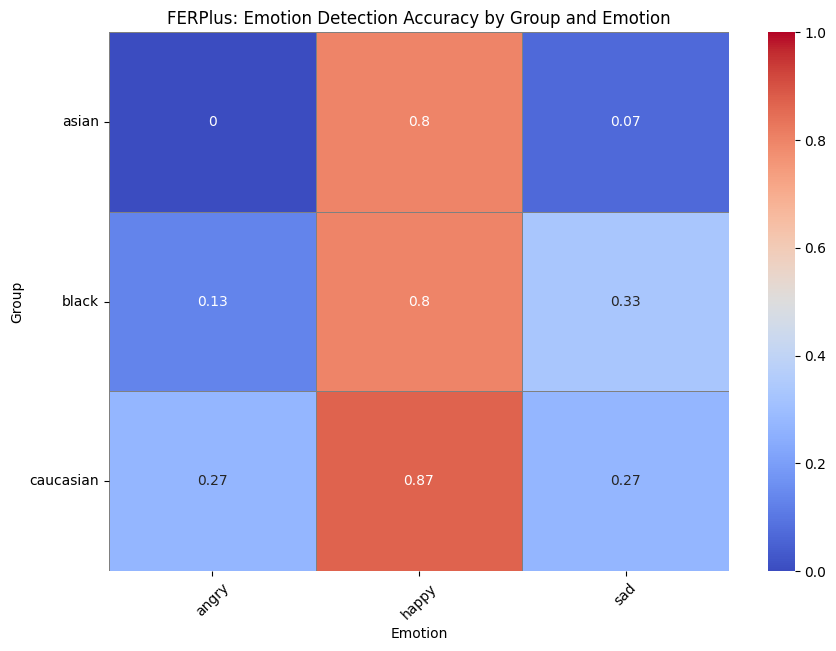

FERPlus: Emotion Detection Accuracy Table (Group x Emotion):
true_emotion  angry  happy   sad
group                           
asian          0.00   0.80  0.07
black          0.13   0.80  0.33
caucasian      0.27   0.87  0.27


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算每個 group 和 emotion 的準確率
accuracy_table = df_ferplus.groupby(['group', 'true_emotion']).apply(
    lambda x: (x['true_emotion'] == x['predicted_emotion']).mean()
).unstack()

# 四捨五入到小數點後2位
accuracy_table_rounded = accuracy_table.round(2)

# 畫 Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(accuracy_table_rounded, annot=True, cmap='coolwarm', vmin=0, vmax=1, linewidths=0.5, linecolor='gray')
plt.title('FERPlus: Emotion Detection Accuracy by Group and Emotion')
plt.ylabel('Group')
plt.xlabel('Emotion')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# 額外印出數字表格
print("FERPlus: Emotion Detection Accuracy Table (Group x Emotion):")
print(accuracy_table_rounded)


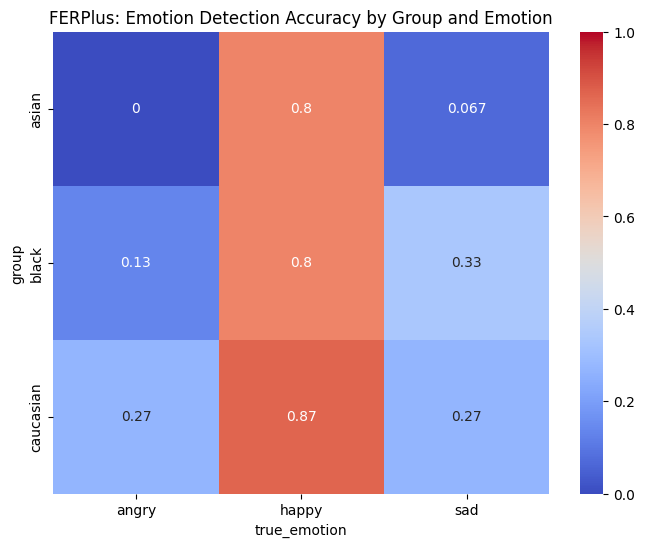

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算每個group和emotion的準確率
accuracy_table = df_ferplus.groupby(['group', 'true_emotion']).apply(
    lambda x: (x['true_emotion'] == x['predicted_emotion']).mean()
).unstack()

# 畫Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(accuracy_table, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('FERPlus: Emotion Detection Accuracy by Group and Emotion')
plt.show()


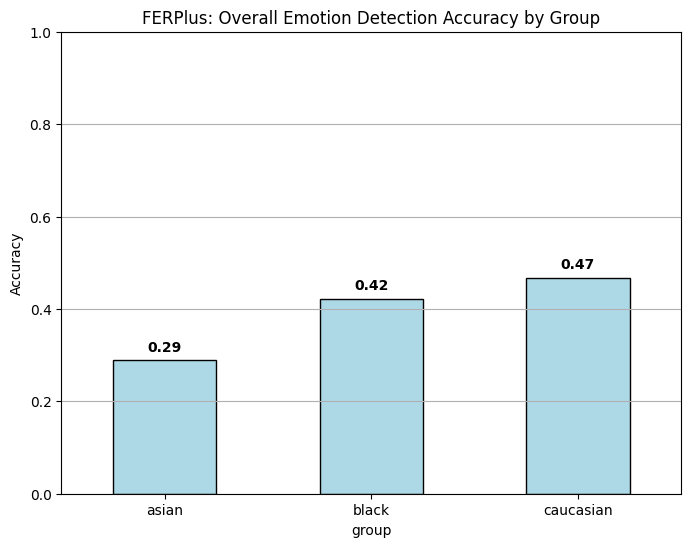

FERPlus: Overall Emotion Detection Accuracy by Group:
group
asian        0.289
black        0.422
caucasian    0.467
dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# 每一個族群總體準確率
group_accuracy = df_ferplus.groupby('group').apply(
    lambda x: (x['true_emotion'] == x['predicted_emotion']).mean()
)

# 畫 bar chart
plt.figure(figsize=(8, 6))
bars = group_accuracy.plot(kind='bar', color='lightblue', edgecolor='black')

plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('FERPlus: Overall Emotion Detection Accuracy by Group')
plt.xticks(rotation=0)
plt.grid(axis='y')

# 在每個 bar 上方加數字
for i, v in enumerate(group_accuracy):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')

plt.show()

# 額外印出數字表格
print("FERPlus: Overall Emotion Detection Accuracy by Group:")
print(group_accuracy.round(3))


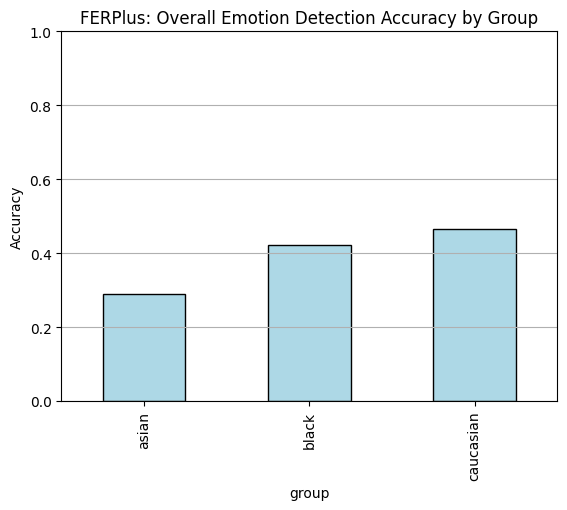

In [ ]:
# 每一個族群總體準確率
group_accuracy = df_ferplus.groupby('group').apply(
    lambda x: (x['true_emotion'] == x['predicted_emotion']).mean()
)

# 畫bar chart
group_accuracy.plot(kind='bar', color='lightblue', edgecolor='black')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('FERPlus: Overall Emotion Detection Accuracy by Group')
plt.grid(axis='y')
plt.show()


In [ ]:
from deepface import DeepFace
import pandas as pd
import os
from tqdm import tqdm

# 設定資料夾
root_folder = './'
groups = ['caucasian', 'asian', 'black']
true_emotions = ['happy', 'sad', 'angry']

# Positive / Negative mapping
positive_emotions = ['happy']
negative_emotions = ['sad', 'angry']

results = []

for group in groups:
    folder = os.path.join(root_folder, group)
    print(f"Processing group: {group}")
    for file in tqdm(os.listdir(folder), desc=f'Processing {group}'):
        if file.endswith('.jpg') or file.endswith('.png'):
            filepath = os.path.join(folder, file)
            try:
                prediction = DeepFace.analyze(filepath, actions=['emotion'], enforce_detection=False, detector_backend='opencv')

                # 預測情緒
                pred_emotion = max(prediction[0]['emotion'], key=prediction[0]['emotion'].get).lower()

                # 轉成 Positive/Negative
                pred_class = 'positive' if pred_emotion in positive_emotions else 'negative'

                # 解析真實情緒 (從檔名)
                true_label = None
                for emo in true_emotions:
                    if emo in file.lower():
                        true_label = emo
                        break

                if true_label is not None:
                    true_class = 'positive' if true_label in positive_emotions else 'negative'

                    results.append({
                        'group': group,
                        'true_class': true_class,
                        'predicted_class': pred_class
                    })
            except Exception as e:
                print(f"Error processing {filepath}: {e}")

# 轉成DataFrame
df_binary = pd.DataFrame(results)

print(df_binary.head())


Processing group: caucasian


Processing caucasian: 100%|██████████| 45/45 [00:04<00:00, 10.93it/s]


Processing group: asian


Processing asian: 100%|██████████| 45/45 [00:04<00:00, 10.53it/s]


Processing group: black


Processing black: 100%|██████████| 45/45 [00:04<00:00, 10.58it/s]

       group true_class predicted_class
0  caucasian   negative        negative
1  caucasian   positive        positive
2  caucasian   negative        negative
3  caucasian   negative        negative
4  caucasian   negative        negative


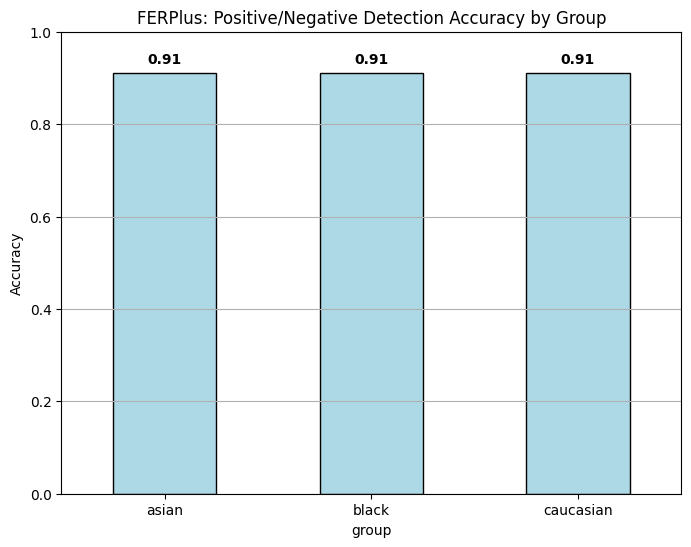

FERPlus: Positive/Negative Detection Accuracy by Group:
group
asian        0.911
black        0.911
caucasian    0.911
dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# 每一族群的正確率
group_binary_accuracy = df_binary.groupby('group').apply(
    lambda x: (x['true_class'] == x['predicted_class']).mean()
)

# 畫 bar chart
plt.figure(figsize=(8, 6))
bars = group_binary_accuracy.plot(kind='bar', color='lightblue', edgecolor='black')

plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('FERPlus: Positive/Negative Detection Accuracy by Group')
plt.xticks(rotation=0)
plt.grid(axis='y')

# 在每個 bar 上方加數字
for i, v in enumerate(group_binary_accuracy):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')

plt.show()

# 額外印出數字表格
print("FERPlus: Positive/Negative Detection Accuracy by Group:")
print(group_binary_accuracy.round(3))


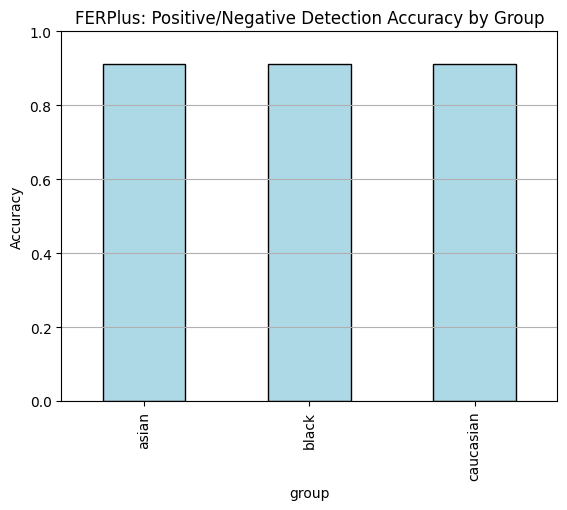

In [ ]:
# 每一族群的正確率
group_binary_accuracy = df_binary.groupby('group').apply(
    lambda x: (x['true_class'] == x['predicted_class']).mean()
)

# 畫bar chart
group_binary_accuracy.plot(kind='bar', color='lightblue', edgecolor='black')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('FERPlus: Positive/Negative Detection Accuracy by Group')
plt.grid(axis='y')
plt.show()


In [ ]:
summary = df_binary.groupby(['group', 'true_class']).apply(
    lambda x: (x['true_class'] == x['predicted_class']).mean()
).unstack()

print(summary)


true_class  negative  positive
group                         
asian       0.966667  0.800000
black       0.966667  0.800000
caucasian   0.933333  0.866667


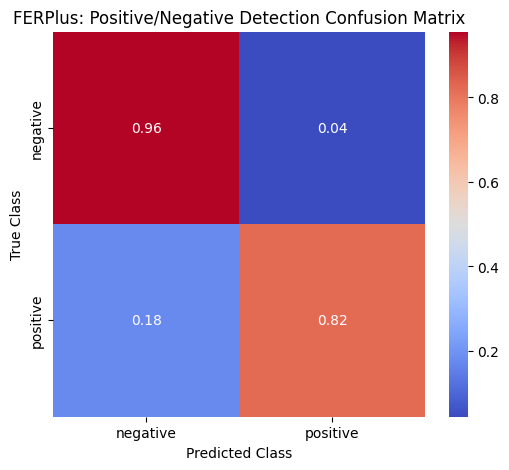

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 製作混淆矩陣（Confusion Matrix）
conf_matrix = pd.crosstab(df_binary['true_class'], df_binary['predicted_class'], normalize='index')

# 畫Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('FERPlus: Positive/Negative Detection Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


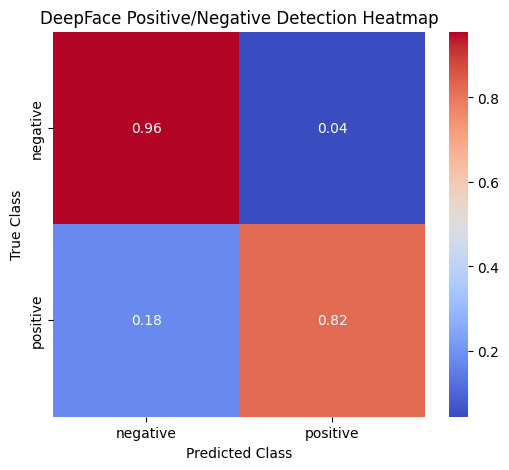

In [ ]:
# 針對 DeepFace 的 DataFrame（假設叫 df_deepface）
# Assuming df is the DataFrame from previous DeepFace analysis
df_deepface = df.copy()  # Create a copy of df to avoid modifying the original

# Assuming 'true_emotion' column exists in df_deepface to derive 'true_class'
# Instead of 'true_emotion', use 'file' column to derive 'true_class'
df_deepface['true_class'] = df_deepface['file'].apply(lambda x: 'positive' if 'happy' in x.lower() else 'negative')
# Instead of 'predicted_emotion', use 'emotion' column to derive 'predicted_class'
df_deepface['predicted_class'] = df_deepface['emotion'].apply(lambda x: 'positive' if 'happy' in x.lower() else 'negative')


# 製作混淆矩陣
conf_matrix_deepface = pd.crosstab(df_deepface['true_class'], df_deepface['predicted_class'], normalize='index')

# 畫Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_deepface, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('DeepFace Positive/Negative Detection Heatmap')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

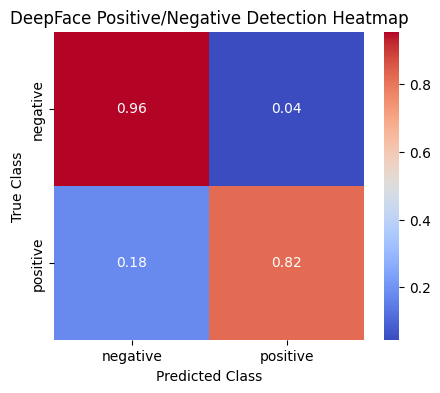

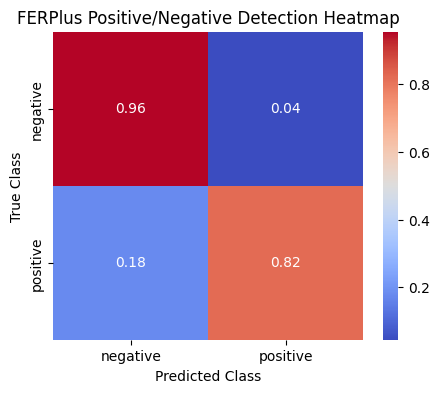

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your three DataFrames are named:
# df_deepface, df_minixception, df_ferplus

# Define a unified conversion function
def add_pos_neg_label(df, true_col='file', pred_col='emotion'):
    """
    Adds 'true_class' and 'predicted_class' columns to the DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        true_col (str): The column name containing the true emotion labels.
        pred_col (str): The column name containing the predicted emotion labels.
    """
    df['true_class'] = df[true_col].apply(lambda x: 'positive' if 'happy' in x.lower() else 'negative')
    df['predicted_class'] = df[pred_col].apply(lambda x: 'positive' if 'happy' in x.lower() else 'negative')
    return df

# Add true_class and predicted_class for each model
df_deepface = add_pos_neg_label(df_deepface, true_col='file', pred_col='emotion')  # Updated to use 'file' and 'emotion'
# Assuming df_minixception has similar structure to df_deepface, using same column names
# df_minixception = add_pos_neg_label(df_minixception, true_col='file', pred_col='emotion') if 'df_minixception' in locals() else None  # Assuming file and emotion are relevant columns
# df_ferplus is already processed and has columns 'true_emotion', 'predicted_emotion'
df_ferplus = add_pos_neg_label(df_ferplus, true_col='true_emotion', pred_col='predicted_emotion')  # Assuming true_emotion and predicted_emotion


# Plotting function
def plot_heatmap(df, title):
    conf_matrix = pd.crosstab(df['true_class'], df['predicted_class'], normalize='index')
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(title)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()

# Plot heatmaps for each model
plot_heatmap(df_deepface, 'DeepFace Positive/Negative Detection Heatmap')
# if df_minixception is not None:  # Only plot if df_minixception was defined
#     plot_heatmap(df_minixception, 'Mini-Xception Positive/Negative Detection Heatmap')
plot_heatmap(df_ferplus, 'FERPlus Positive/Negative Detection Heatmap')

In [ ]:
def add_pos_neg_label(df):
    df['true_class'] = df['file'].apply(lambda x: 'positive' if 'happy' in x.lower() else 'negative')
    df['predicted_class'] = df['emotion'].apply(lambda x: 'positive' if 'happy' in x.lower() else 'negative')
    return df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_group_heatmaps(df, model_name):
    """
    畫出 Group × Emotion 的準確率 Heatmap
    df: 包含 'group', 'true_emotion', 'predicted_emotion' 的資料框
    model_name: 模型名稱 (字串)
    """
    if df is None or df.empty:
        print(f"[Warning] {model_name} 的資料是空的，跳過繪圖。")
        return

    # Rename columns to match expected names
    df = df.rename(columns={'race': 'group', 'file': 'true_emotion', 'emotion': 'predicted_emotion'})

    # 計算每個 group 和 emotion 的準確率
    accuracy_table = df.groupby(['group', 'true_emotion']).apply(
        lambda x: (x['true_emotion'] == x['predicted_emotion']).mean()
    ).unstack()

    # 四捨五入
    accuracy_table = accuracy_table.round(2)

    # 畫 Heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(accuracy_table, annot=True, cmap='coolwarm', vmin=0, vmax=1, linewidths=0.5, linecolor='gray')
    plt.title(f'{model_name}: Emotion Detection Accuracy by Group and Emotion')
    plt.ylabel('Group')
    plt.xlabel('Emotion')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

    # 額外印出表格
    print(f"\n{model_name}: Group × Emotion Accuracy Table:")
    print(accuracy_table)

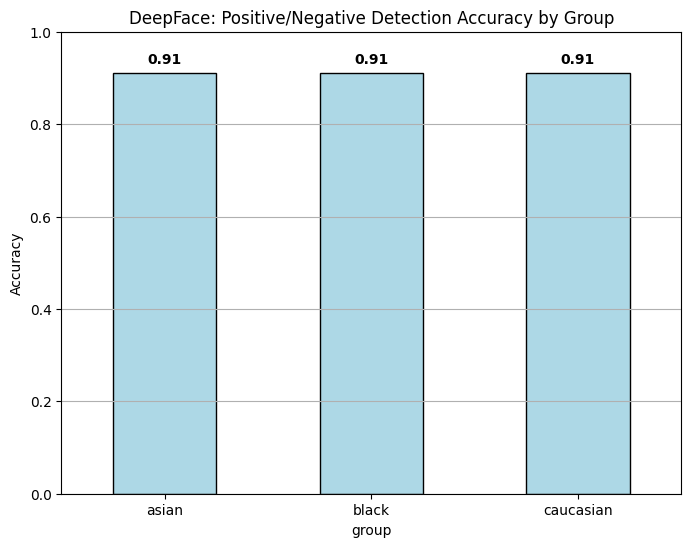

DeepFace: Positive/Negative Detection Accuracy by Group:
group
asian        0.911
black        0.911
caucasian    0.911
dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# 每一族群的正確率 (DeepFace)
# Rename 'race' column to 'group'
df_deepface = df_deepface.rename(columns={'race': 'group'})

group_binary_accuracy = df_deepface.groupby('group').apply(
    lambda x: (x['true_class'] == x['predicted_class']).mean()
)

# 畫 bar chart
plt.figure(figsize=(8, 6))
bars = group_binary_accuracy.plot(kind='bar', color='lightblue', edgecolor='black')

plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('DeepFace: Positive/Negative Detection Accuracy by Group')
plt.xticks(rotation=0)
plt.grid(axis='y')

# 在每個 bar 上方加數字
for i, v in enumerate(group_binary_accuracy):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')

plt.show()

# 額外印出數字表格
print("DeepFace: Positive/Negative Detection Accuracy by Group:")
print(group_binary_accuracy.round(3))

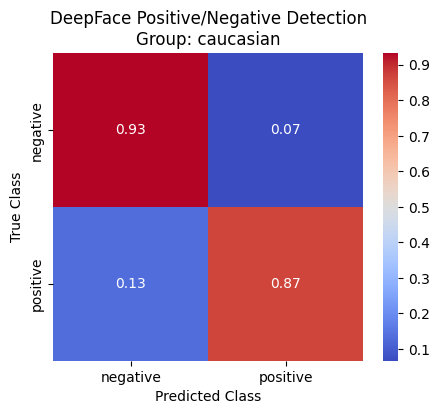

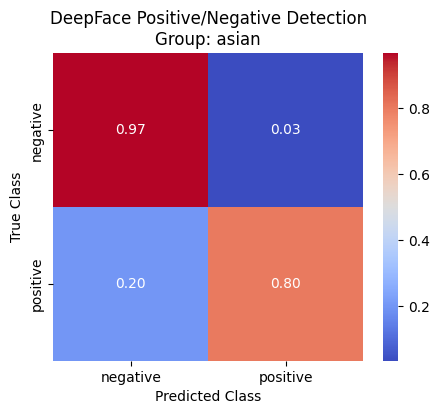

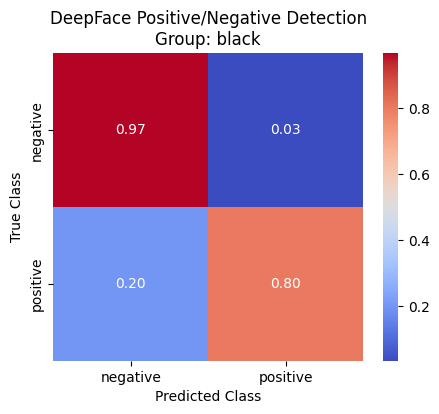

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假設 df_deepface 已經透過你的函數處理過，包含 'true_class', 'predicted_class', 'group'

# 分族群畫 Heatmap 的函數
def plot_group_heatmaps(df, model_name):
    groups = df['group'].unique()

    for group in groups:
        df_group = df[df['group'] == group]

        conf_matrix = pd.crosstab(
            df_group['true_class'], df_group['predicted_class'], normalize='index'
        )

        plt.figure(figsize=(5, 4))
        sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

        plt.title(f'{model_name} Positive/Negative Detection\nGroup: {group}')
        plt.xlabel('Predicted Class')
        plt.ylabel('True Class')
        plt.show()

# 呼叫函數以各族群繪製 Heatmap
plot_group_heatmaps(df_deepface, 'DeepFace')
